In [1]:
from orion.data import load_signal, load_anomalies

from src.m2ad import M2AD

In [2]:
data = load_signal('multivariate/S-1-train')

time_column = 'timestamp'
sensor_columns = ['0']
covariate_columns = list(map(str, range(1, len(data.columns)-1)))

data.head()

,timestamp,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,1222819200,-0.366359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1222840800,-0.394108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1222862400,0.403625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1222884000,-0.362759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1222905600,-0.370746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
model = M2AD(dataset='SMAP', entity='S-1', 
             time_column=time_column, 
             sensors=sensor_columns, 
             covariates=covariate_columns, 
             epochs=10, 
             error_name='area',
             feature_range=(0, 1))

In [4]:
model.fit(data, tolerance=5)

Epoch 1/10: train loss  0.1049 | val loss  0.1059.
Epoch 2/10: train loss  0.1017 | val loss  0.1120.
Epoch 3/10: train loss  0.1012 | val loss  0.1047.
Epoch 4/10: train loss  0.0983 | val loss  0.1039.
Epoch 5/10: train loss  0.0963 | val loss  0.1016.
Epoch 6/10: train loss  0.0970 | val loss  0.1089.
Epoch 7/10: train loss  0.0979 | val loss  0.0997.
Epoch 8/10: train loss  0.0956 | val loss  0.0998.
Epoch 9/10: train loss  0.0951 | val loss  0.0989.
Epoch 10/10: train loss  0.0955 | val loss  0.1006.


In [5]:
test = load_signal('multivariate/S-1-test')

anomalies, targets, pred, gamma_pval, pval, fisher, fisher_values, errors, train_errors, train_targets, train_pred, time = model.detect(test)

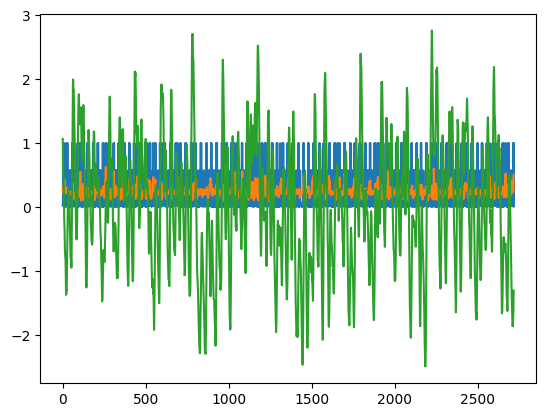

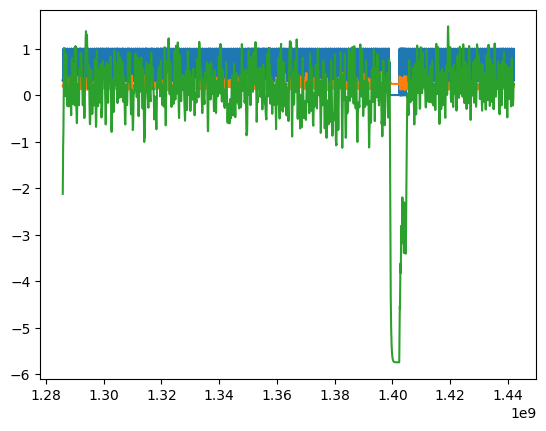

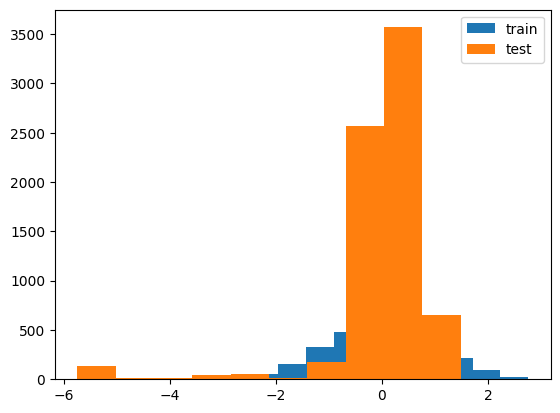

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(train_targets)
plt.plot(train_pred)
plt.plot(train_errors)
plt.show();

plt.plot(time[100:-1], targets)
plt.plot(time[100:-1], pred)
plt.plot(time[100:-1], errors)
plt.show();

plt.hist(train_errors, label='train')
plt.hist(errors, label='test')
plt.legend()
plt.show();

In [7]:
anomalies

,dataset,entity,anomaly
0,SMAP,S-1,1399312800
1,SMAP,S-1,1399334400
2,SMAP,S-1,1399356000
3,SMAP,S-1,1399377600
4,SMAP,S-1,1399399200
...,...,...,...
186,SMAP,S-1,1404626400
187,SMAP,S-1,1404648000
188,SMAP,S-1,1404669600
189,SMAP,S-1,1404691200
